In [8]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from keras.optimizers import Adam,SGD
import numpy as np
from keras.utils import to_categorical

In [9]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [10]:
train_images, test_images=train_images/255.0, test_images/255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


###FEED FORWARD NEURAL NETWORK

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3016 - accuracy: 0.9159 - val_loss: 0.1707 - val_accuracy: 0.9515
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1425 - accuracy: 0.9585 - val_loss: 0.1305 - val_accuracy: 0.9607
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1032 - accuracy: 0.9701 - val_loss: 0.1041 - val_accuracy: 0.9677
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0811 - accuracy: 0.9758 - val_loss: 0.0986 - val_accuracy: 0.9699
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0674 - accuracy: 0.9796 - val_loss: 0.0814 - val_accuracy: 0.9751
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0562 - accuracy: 0.9829 - val_loss: 0.0929 - val_accuracy: 0.9715
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0957 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.0557 - accuracy: 0.9905


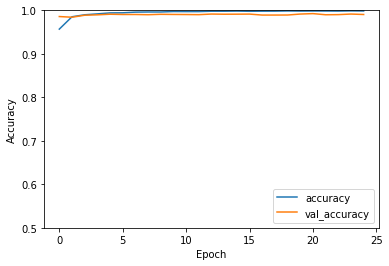

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels)

#CNN MODEL

In [15]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels))


Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1414 - accuracy: 0.9568 - val_loss: 0.0435 - val_accuracy: 0.9858
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0465 - accuracy: 0.9853 - val_loss: 0.0476 - val_accuracy: 0.9842
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0329 - val_accuracy: 0.9888
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0317 - val_accuracy: 0.9897
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0193 - accuracy: 0.9941 - val_loss: 0.0313 - val_accuracy: 0.9911
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0346 - val_accuracy: 0.9905
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.0318 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.0557 - accuracy: 0.9905


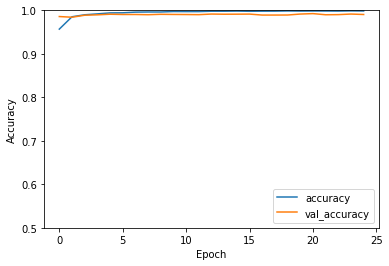

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels)